In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score # Jaccard Similarity

[Text(0,0.5,'Genre'), Text(0.5,0,'Anime Count')]

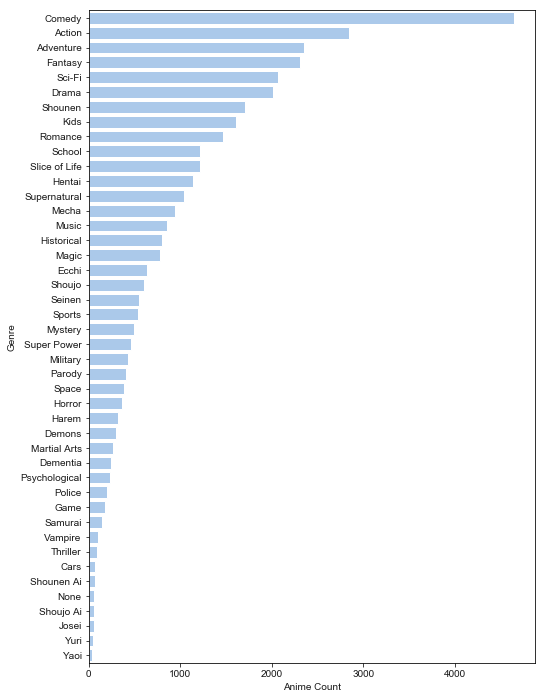

In [2]:
animes = pd.read_csv('anime-dataset-kaggle/anime.csv') # load the data
animes['genre'] = animes['genre'].fillna('None') # filling 'empty' data
animes['genre'] = animes['genre'].apply(lambda x: x.split(', ')) # split genre into list of individual genre

genre_data = itertools.chain(*animes['genre'].values.tolist()) # flatten the list
genre_counter = collections.Counter(genre_data)
genres = pd.DataFrame.from_dict(genre_counter, orient='index').reset_index().rename(columns={'index':'genre', 0:'count'})
genres.sort_values('count', ascending=False, inplace=True)

# Plot genre
f, ax = plt.subplots(figsize=(8, 12))
sns.set_color_codes("pastel")
sns.set_style("white")
sns.barplot(x="count", y="genre", data=genres, color='b')
ax.set(ylabel='Genre',xlabel="Anime Count")

In [3]:
genre_map = {genre: idx for idx, genre in enumerate(genre_counter.keys())}
def extract_feature(genre):
    feature = np.zeros(len(genre_map.keys()), dtype=int)
    feature[[genre_map[idx] for idx in genre]] += 1
    return feature
    
anime_feature = pd.concat([animes['name'], animes['genre']], axis=1)
anime_feature['genre'] = anime_feature['genre'].apply(lambda x: extract_feature(x))
print(anime_feature.head(80))

                                                 name  \
0                                      Kimi no Na wa.   
1                    Fullmetal Alchemist: Brotherhood   
2                                            Gintama°   
3                                         Steins;Gate   
4                                       Gintama&#039;   
5   Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   
6                              Hunter x Hunter (2011)   
7                                Ginga Eiyuu Densetsu   
8   Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
9                            Gintama&#039;: Enchousen   
10                               Clannad: After Story   
11                                     Koe no Katachi   
12                                            Gintama   
13                 Code Geass: Hangyaku no Lelouch R2   
14                            Haikyuu!! Second Season   
15                      Sen to Chihiro no Kamikakushi   
16                            S

In [4]:
test_data = anime_feature.take([0, 19, 1, 2, 16, 23, 6, 49, 220, 66])
for row in test_data.iterrows():
    print('Similar anime like {}:'.format(row[1]['name']))
    search = anime_feature.drop([row[0]]) # drop current anime
    search['result'] = search['genre'].apply(lambda x: jaccard_score(row[1]['genre'], x))
    search_result = search.sort_values('result', ascending=False)['name'].head(25)
    for res in search_result.values:
        print('\t{}'.format(res))
    print()

Similar anime like Kimi no Na wa.:
	Wind: A Breath of Heart OVA
	Wind: A Breath of Heart (TV)
	Aura: Maryuuin Kouga Saigo no Tatakai
	Myself; Yourself
	&quot;Bungaku Shoujo&quot; Memoire
	Venus Versus Virus
	Tokimeki Memorial: Forever With You
	Mizuiro (2003)
	School Days ONA
	Kokoro ga Sakebitagatterunda.
	Harmonie
	Koi to Senkyo to Chocolate: Ikenai Hazuki-sensei
	Myself ; Yourself Specials
	Clannad: After Story - Mou Hitotsu no Sekai, Kyou-hen
	Kimikiss Pure Rouge
	Koi to Senkyo to Chocolate
	Angel Beats!: Another Epilogue
	True Tears
	To Heart 2 Special
	Air Movie
	Otome wa Boku ni Koishiteru: Futari no Elder
	Touka Gettan
	Koi to Senkyo to Chocolate Special
	Kokoro Connect: Michi Random
	Shakugan no Shana II (Second)

Similar anime like Code Geass: Hangyaku no Lelouch:
	Code Geass: Hangyaku no Lelouch Recaps
	Code Geass: Hangyaku no Lelouch Special Edition Black Rebellion
	Code Geass: Fukkatsu no Lelouch
	Code Geass: Hangyaku no Lelouch R2
	Chou Seimeitai Transformers Beast Wars M